# 3. Machine Learning for Classification

We want to identify that clients that are willing to churn (= stop using this services)
How could we do this? We give every customer a score between 0 and 1 that tells how likely this customer is going to leave. Then we can send promotional e-mails to this customers – giving some discount to keep this customer.

The way we approach this with Machine Learning is Binary Classification

The formula for one single observation: g(xi) ~ yi

Output of our model is yi that is a value between {0, 1} which is the likelihood that this particular customer number i is going to churn.
1 means positive example, customer left the company, 0 means negative example, customer didn’t left the company. So in general 1 means that there is something present (the effect we want to predict is present) and 0 means that it’s not present.

We'll use logistic regression to predict churn


## 3.1 Churn prediction project

* Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
* https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv


## 3.2 Data preparation

* Download the data, read it with pandas
* Look at the data
* Make column names and values look uniform
* Check if all the columns read correctly
* Check if the churn variable needs any preparation

### Download the data

In [82]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [83]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [84]:
!wget $data -O data-week-3.csv 

--2025-02-05 01:32:13--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: 'data-week-3.csv'

data-week-3.csv     100%[===================>] 954.59K  --.-KB/s    in 0.008s  

2025-02-05 01:32:13 (119 MB/s) - 'data-week-3.csv' saved [977501/977501]



### Reading data

In [85]:
df = pd.read_csv('data-week-3.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


To display all of them simultaneously, we can use the transpose function. This will switch the rows to become columns and the columns to become rows.

In [86]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


### Making column names and values look uniform

What we can observe here is that the data is not consistent or uniform. So, we’ll follow a similar approach as we did before in the car price prediction project

In [87]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [88]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


### Verify that all the columns have been read correctly

In [89]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [90]:
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

Indeed, ‘totalcharges’ appears to be numeric in nature. It seems that some of the values are not in numeric format. Let’s attempt to convert them into numbers

In [91]:
# pd.to_numeric(df.totalcharges) # Output: ValueError: Unable to parse string “_” at position

# This means that the column doesn’t only contain numbers but also includes characters like ‘_’, which are not numeric.
# If Pandas encounters a string that it cannot parse as a number, we can instruct it to ignore the string and replace it 
# with ‘NaN’ (Not a number). This can be achieved by using a parameter called ‘errors,’ and setting it to ‘coerce,’ 
# which means Pandas will disregard such errors.

tc = pd.to_numeric(df.totalcharges, errors='coerce') # tc means total charges
tc

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [92]:
tc.isnull().sum()

np.int64(11)

In [93]:
# df[tc.isnull()] # it's not easy to see so we need a different one
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [94]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)
df.totalcharges.isnull().sum()

np.int64(0)

### Checking if the churn variable needs any preparation

In [95]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [96]:
(df.churn == 'yes').astype(int).head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [97]:
df.churn = (df.churn == 'yes').astype(int)
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

## 3.3 Setting up the validation framework

* Perform the train/validation/test split with Scikit-Learn. You can utilize the train_test_split function from the sklearn.model_selection package to automate the splitting of your data into training, validation, and test sets

In [98]:
from sklearn.model_selection import train_test_split
# train_test_split? # To see the documentation

In [99]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1) # train_test_split function creates shuffled datasets.
len(df_full_train), len(df_test)

(5634, 1409)

In [100]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val)

(4225, 1409)

In [101]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [102]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [103]:
y_full_train = df_full_train.churn.values
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [104]:
del df_train['churn']
del df_val['churn']
del df_test['churn'] 

## 3.4 EDA

* Check missing values
* Look at the target variable (churn)
* Look at numerical and categorical variables

### Checking missing values

In [105]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [106]:
# Above, dataset ‘df_full_train’ contains no missing values

### Looking at the target variable (churn)

In [107]:
df_full_train.churn

1814    0
5946    1
3881    0
2389    0
3676    0
       ..
905     1
5192    0
3980    1
235     1
5157    0
Name: churn, Length: 5634, dtype: int64

In [108]:
df_full_train.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [109]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [110]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

np.float64(0.27)

### Looking at numerical and categorical variables

In [111]:
numerical_vars = df.select_dtypes(include=['int64', 'float64'])
categorical_vars = df.select_dtypes(include=['object'])
 
print("Numerical Variables:")
print(numerical_vars.columns)
 
print("\nCategorical Variables:")
print(categorical_vars.columns)

Numerical Variables:
Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges', 'churn'], dtype='object')

Categorical Variables:
Index(['customerid', 'gender', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object')


In [112]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [113]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [114]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [115]:
# Removed 'customerid', 'tenure', 'monthlycharges', 'totalcharges', and 'churn' column
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [116]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 3.5 Feature importance: Churn rate and risk ratio
(source: https://knowmledge.com/2023/09/28/ml-zoomcamp-2023-machine-learning-for-classification-part-5/)


Feature importance analysis (part of EDA) - identifying which features affect our target variable

* Churn rate
* Risk ratio
* Mutual information - later

### Churn rate

In [117]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [118]:
# Selecting the subset of female customers
df_full_train[df_full_train.gender == 'female']

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
611,4765-oxppd,female,0,yes,yes,9,yes,no,dsl,yes,...,yes,yes,no,no,month-to-month,no,mailed_check,65.00,663.05,1
2890,1732-vhubq,female,1,yes,yes,47,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,no,bank_transfer_(automatic),70.55,3309.25,1
5150,7017-vfuly,female,0,yes,no,2,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,bank_transfer_(automatic),20.10,43.15,0
997,1374-dmzui,female,1,no,no,4,yes,yes,fiber_optic,no,...,no,no,yes,yes,month-to-month,yes,electronic_check,94.30,424.45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5374,8065-ykxkd,female,0,no,no,10,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,74.75,799.65,1
5396,5627-tvbpp,female,0,no,yes,35,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,yes,credit_card_(automatic),20.10,644.50,0
5056,3262-eidhv,female,0,yes,yes,72,yes,yes,dsl,yes,...,yes,yes,yes,yes,two_year,no,credit_card_(automatic),84.70,5893.90,0
2895,7446-sfaoa,female,0,yes,no,37,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,yes,bank_transfer_(automatic),19.85,717.50,0


In [119]:
global_churn = df_full_train.churn.mean()
global_churn

np.float64(0.26996805111821087)

In [120]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [121]:
global_churn - churn_female

np.float64(-0.006855983216553063)

In [122]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

np.float64(0.2632135306553911)

In [123]:
global_churn - churn_male

np.float64(0.006754520462819769)

In [124]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [125]:
global_churn = df_full_train.churn.mean()
global_churn

np.float64(0.26996805111821087)

In [126]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

np.float64(0.20503330866025166)

In [127]:
global_churn - churn_partner

np.float64(0.06493474245795922)

In [128]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

np.float64(0.3298090040927694)

In [129]:
global_churn - churn_no_partner

np.float64(-0.05984095297455855)

### Risk ratio

In [130]:
churn_no_partner / global_churn

np.float64(1.2216593879412643)

In [131]:
churn_partner / global_churn

np.float64(0.7594724924338315)

```
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;
```

In [132]:
df_full_train.groupby('gender').churn.mean()

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

In [133]:
# agg takes a list of different aggregations
df_full_train.groupby('gender').churn.agg(['mean', 'count'])

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [134]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn
df_group['risk'] = df_group['mean'] / global_churn
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [135]:
from IPython.display import display

In [136]:
for c in categorical:
    # print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


#### The article explains two key tools for assessing feature importance in churn prediction: difference and risk ratio.

- Difference is found by subtracting a group's churn rate from the global churn rate. A negative value means a higher chance of churn, while a positive value means a lower chance.
- Risk ratio is calculated by dividing a group’s churn rate by the global churn rate. A value above 1 suggests higher churn likelihood, and below 1 suggests lower churn likelihood.



Both metrics provide similar insights in different ways. They help identify which categories show higher or lower churn rates compared to the average, making them useful for machine learning models. The next step is to measure the overall importance of each variable, like comparing "contract" and "streamingmovies."

## 3.6 Feature importance: Mutual information

(source: https://knowmledge.com/2023/09/28/ml-zoomcamp-2023-machine-learning-for-classification-part-6/)

Indeed the risk ratio helps identify important categorical variables by showing how likely customers are to churn based on different values. For example, customers with month-to-month contracts tend to churn more than those with two-year contracts, indicating that contract type is an important factor in churn prediction. However, without a way to compare its importance to other variables, its relative significance remains unclear.

Mutual information solves this by measuring how much knowing one variable helps predict another. Higher mutual information means a variable provides more insight into churn. This allows for comparing the importance of different categorical variables in predicting churn.

So, the Mutual information is a concept from information theory, it tells us how much 
we can learn about one variable if we know the value of another

In [137]:
from sklearn.metrics import mutual_info_score

In [138]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

np.float64(0.0983203874041556)

In [139]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

np.float64(0.0983203874041556)

In [140]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

np.float64(0.0001174846211139946)

In [141]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

np.float64(0.009967689095399745)

In [142]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [143]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi

gender              0.000117
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
dtype: float64

In [144]:
### To arrange this list in such a way that the most important variables come first, we can sort the variables 
# based on their mutual information scores in descending order. This way, the most important variables 
# will appear at the top of the list.
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## 3.7 Feature importance: Correlation

(source: https://knowmledge.com/2023/09/29/ml-zoomcamp-2023-machine-learning-for-classification-part-7/)

To measure the importance of numerical features, you can use Pearson’s correlation coefficient (r), which shows how strongly two numerical variables are related.

Understanding Correlation:
- Range: r is between -1 and 1.
    - r = -1 → Strong negative correlation (one increases, the other decreases).
    - r = 1 → Strong positive correlation (both increase together).
    - r ≈ 0 → Weak or no linear relationship.
- Strength of Correlation:
    - 0.0 < |r| < 0.2 → Low correlation
    - 0.2 < |r| < 0.5 → Moderate correlation
    - 0.6 < |r| < 1.0 → Strong correlation

How to Calculate in Python:
Use the `corr()` function from pandas:

`correlation = df[numerical_vars].corr()['churn']`

This gives correlation values between numerical features and churn, which you can sort to find the most important features.

Interpreting Correlation in Churn Prediction:
- Positive correlation: As a variable (e.g., tenure) increases, churn likelihood also increases.
- Negative correlation: As a variable (e.g., tenure) increases, churn likelihood decreases.
- Zero correlation: No significant relationship with churn.

By calculating Pearson’s correlation, you can identify which numerical features have the most impact on churn prediction. Higher absolute values of r indicate stronger importance.

In [145]:
df_full_train[numerical]

,tenure,monthlycharges,totalcharges
1814,12,19.70,258.35
5946,42,73.90,3160.55
3881,71,65.15,4681.75
2389,71,85.45,6300.85
3676,30,70.40,2044.75
...,...,...,...
905,9,100.50,918.60
5192,60,19.95,1189.90
3980,28,105.70,2979.50
235,2,54.40,114.10


In [146]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [147]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [148]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [149]:
df_full_train[df_full_train.tenure > 2].churn.mean()

np.float64(0.22478269658378816)

In [150]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

np.float64(0.3994413407821229)

In [151]:
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

In [152]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

np.float64(0.08795411089866156)

In [153]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

np.float64(0.18340943683409436)

In [154]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

np.float64(0.32499341585462205)

## 3.8 One-hot encoding

(Source: https://knowmledge.com/2023/09/29/ml-zoomcamp-2023-machine-learning-for-classification-part-8/)

One-hot encoding converts categorical data into a numeric format for machine learning models that require numerical input.

Problem:
Categorical data (e.g., “color” with values like “red,” “green,” “blue”) cannot be directly used in machine learning because models require numerical input.

How One-Hot Encoding Works:
- It creates a separate binary (0 or 1) feature for each category in a categorical variable.
- Example:
    - For the "color" feature, it creates three binary features: "IsRed," "IsGreen," "IsBlue."
    - If the color is "red," then "IsRed" = 1, while "IsGreen" = 0 and "IsBlue" = 0.

Scikit-Learn provides tools for performing one-hot encoding, making it easy to transform categorical data into a numerical format for machine learning models.

### Use Scikit-Learn to encode categorical features

In [155]:
# turns each column into a dictionary --> but the result is not what we want here
# df_train[['gender', 'contract']].iloc[:100].to_dict()
 
dicts = df_train[['gender', 'contract']].iloc[:100].to_dict(orient='records')
dicts

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {

In [156]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer()

dv.fit(dicts)

DictVectorizer()

In [157]:
dv.transform(dicts)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 200 stored elements and shape (100, 5)>

In [158]:
dv = DictVectorizer(sparse=False)
dv.fit(dicts)
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

In [159]:
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

In [160]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [161]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dicts)
 
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [162]:
# Short version without long outputs:
from sklearn.feature_extraction import DictVectorizer
 
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
 
dv.fit(train_dicts)
X_train = dv.transform(train_dicts)
# instead of last two lines, you can also use
# X_train = dv.fit_transform(train_dicts)

X_train.shape
# Output: (4225, 45)

(4225, 45)

In [163]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

## 3.9 Logistic regression

(source: https://knowmledge.com/2023/09/30/ml-zoomcamp-2023-machine-learning-for-classification-part-9/)

(See last prompt: https://chatgpt.com/share/67a17672-d3ec-8012-b524-d6c7632e3d24)

* Binary classification
* Linear vs logistic regression

### **Logistic Regression (Binary Classification)**  
Logistic regression is used for binary classification, where the target variable (y) has two possible values: **0 or 1** (e.g., "no churn" vs. "churn" or "spam" vs. "no spam").  

### **How It Works:**  
- Instead of predicting a raw number like linear regression, logistic regression outputs a probability (between 0 and 1) that a data point belongs to the **positive class (1).**  
- This is done using the **sigmoid function**, which converts any real number into a value between 0 and 1.  

### **Formulas:**  
- **Linear Regression:**  
  \[
  g(x) = w_0 + w^T x
  \]
  (Outputs values from **-∞ to ∞** → not suitable for probabilities)  

- **Logistic Regression:**  
  \[
  g(x) = \text{SIGMOID}(w_0 + w^T x)
  \]
  (Outputs values from **0 to 1**, making it a probability)  

- **Sigmoid Function:**  
  \[
  \sigma(z) = \frac{1}{1 + e^{-z}}
  \]
  This ensures the output is always between 0 and 1.  

In [164]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [165]:
z = np.linspace(-7, 7, 51)
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

In [166]:
# sigmoid(10000)

In [167]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

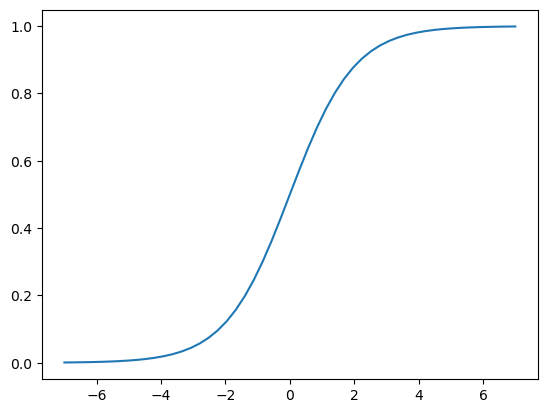

In [168]:
plt.plot(z, sigmoid(z))

In [169]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [170]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    return result

## 3.10 Training logistic regression with Scikit-Learn

(source: https://knowmledge.com/2023/09/30/ml-zoomcamp-2023-machine-learning-for-classification-part-10/)

* Train a model with Scikit-Learn
* Apply it to the validation dataset
* Calculate the accuracy

### Train a model with Scikit-Learn

In [172]:
from sklearn.linear_model import LogisticRegression

In [174]:
model = LogisticRegression(solver='lbfgs')
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train)

/home/studio-lab-user/.conda/envs/ml-zoomcamp/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [177]:
# You can use the ‘coef_’ attribute to display the weights (coefficients) in a logistic regression model.
model.coef_

array([[ 4.74255172e-01, -1.74797527e-01, -4.07106774e-01,
        -2.95555807e-02, -7.80935477e-02,  6.26937682e-02,
        -8.89390674e-02, -8.14038292e-02, -3.43133539e-02,
        -7.33357746e-02, -3.35035731e-01,  3.16325670e-01,
        -8.89390674e-02,  3.67466948e-03, -2.58064091e-01,
         1.41251208e-01,  9.16375458e-03,  6.25301318e-02,
        -8.89390674e-02, -8.12401928e-02,  2.65517049e-01,
        -8.89390674e-02, -2.84227110e-01, -2.31241382e-01,
         1.23592253e-01, -1.65850873e-01,  5.82017445e-02,
        -8.69687306e-02, -3.20825502e-02,  7.06452383e-02,
        -5.92430860e-02,  1.41251208e-01, -2.48900337e-01,
         2.15366150e-01, -1.20264823e-01, -8.89390674e-02,
         1.01554762e-01, -7.08358162e-02, -8.89390674e-02,
         5.21257553e-02,  2.13401390e-01, -8.89390674e-02,
        -2.32111451e-01, -7.04160413e-02,  3.82472628e-04]])

In [179]:
model.coef_[0]

array([ 4.74255172e-01, -1.74797527e-01, -4.07106774e-01, -2.95555807e-02,
       -7.80935477e-02,  6.26937682e-02, -8.89390674e-02, -8.14038292e-02,
       -3.43133539e-02, -7.33357746e-02, -3.35035731e-01,  3.16325670e-01,
       -8.89390674e-02,  3.67466948e-03, -2.58064091e-01,  1.41251208e-01,
        9.16375458e-03,  6.25301318e-02, -8.89390674e-02, -8.12401928e-02,
        2.65517049e-01, -8.89390674e-02, -2.84227110e-01, -2.31241382e-01,
        1.23592253e-01, -1.65850873e-01,  5.82017445e-02, -8.69687306e-02,
       -3.20825502e-02,  7.06452383e-02, -5.92430860e-02,  1.41251208e-01,
       -2.48900337e-01,  2.15366150e-01, -1.20264823e-01, -8.89390674e-02,
        1.01554762e-01, -7.08358162e-02, -8.89390674e-02,  5.21257553e-02,
        2.13401390e-01, -8.89390674e-02, -2.32111451e-01, -7.04160413e-02,
        3.82472628e-04])

In [180]:
model.coef_[0].round(3)

array([ 0.474, -0.175, -0.407, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [183]:
# You can use the ‘intercept_’ attribute to display the bias term (intercept) in a logistic regression model.
model.intercept_

array([-0.10900207])

In [184]:
model.intercept_[0] #actually it's an array with one element

np.float64(-0.10900207468871616)

In [185]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

In [186]:
model.predict_proba(X_train)

array([[0.90447191, 0.09552809],
       [0.32062575, 0.67937425],
       [0.36625455, 0.63374545],
       ...,
       [0.46856881, 0.53143119],
       [0.95742576, 0.04257424],
       [0.30125271, 0.69874729]])

### Apply model to the validation dataset

In [188]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.00900152, 0.20452002, 0.21225857, ..., 0.13642159, 0.79975081,
       0.8373747 ])

In [190]:
churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False, False, ..., False,  True,  True])

In [191]:
df_val[churn_decision]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
3,8433-wxgna,male,0,no,no,2,yes,no,fiber_optic,yes,no,no,no,no,no,month-to-month,yes,electronic_check,75.70,189.20
8,3440-jpscl,female,0,no,no,6,yes,no,fiber_optic,no,no,yes,yes,yes,yes,month-to-month,yes,mailed_check,99.95,547.65
11,2637-fkfsy,female,0,yes,no,3,yes,no,dsl,no,no,no,no,no,no,month-to-month,yes,mailed_check,46.10,130.15
12,7228-omtpn,male,0,no,no,4,yes,no,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,88.45,370.65
19,6711-fldfb,female,0,no,no,7,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,74.90,541.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,5976-jcjrh,male,0,yes,no,10,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.30,738.20
1398,2034-cgrhz,male,1,no,no,24,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,credit_card_(automatic),102.95,2496.70
1399,5276-kqwhg,female,1,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,69.60,131.65
1407,6521-yytyi,male,0,no,yes,1,yes,yes,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,93.30,93.30


In [192]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

### Calculate the accuracy

In [193]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [195]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [68]:
(y_val == churn_decision).mean()

0.8034066713981547

In [196]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [197]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [199]:
df_pred

,probability,prediction,actual,correct
0,0.009002,0,0,True
1,0.204520,0,0,True
2,0.212259,0,0,True
3,0.543170,1,1,True
4,0.213846,0,0,True
...,...,...,...,...
1404,0.313447,0,0,True
1405,0.039366,0,1,False
1406,0.136422,0,0,True
1407,0.799751,1,1,True


In [200]:
df_pred.correct.mean()

np.float64(0.8034066713981547)

## 3.11 Model interpretation

* Look at the coefficients
* Train a smaller model with fewer features

### Look at the coefficients

In [206]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [207]:
model.coef_[0].round(3)

array([ 0.474, -0.175, -0.407, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [208]:
a = [1, 2, 3, 4]
b = 'abcd'

In [209]:
dict(zip(a, b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [210]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.474),
 'contract=one_year': np.float64(-0.175),
 'contract=two_year': np.float64(-0.407),
 'dependents=no': np.float64(-0.03),
 'dependents=yes': np.float64(-0.078),
 'deviceprotection=no': np.float64(0.063),
 'deviceprotection=no_internet_service': np.float64(-0.089),
 'deviceprotection=yes': np.float64(-0.081),
 'gender=female': np.float64(-0.034),
 'gender=male': np.float64(-0.073),
 'internetservice=dsl': np.float64(-0.335),
 'internetservice=fiber_optic': np.float64(0.316),
 'internetservice=no': np.float64(-0.089),
 'monthlycharges': np.float64(0.004),
 'multiplelines=no': np.float64(-0.258),
 'multiplelines=no_phone_service': np.float64(0.141),
 'multiplelines=yes': np.float64(0.009),
 'onlinebackup=no': np.float64(0.063),
 'onlinebackup=no_internet_service': np.float64(-0.089),
 'onlinebackup=yes': np.float64(-0.081),
 'onlinesecurity=no': np.float64(0.266),
 'onlinesecurity=no_internet_service': np.float64(-0.089),
 'onlinesecurity=yes'

### Train a smaller model with fewer features

In [213]:
# Let’s take a subset of features to train a model with fewer features.
small = ['contract', 'tenure', 'monthlycharges']
df_train[small].iloc[:10]

,contract,tenure,monthlycharges
0,two_year,72,115.50
1,month-to-month,10,95.25
2,month-to-month,5,75.55
3,month-to-month,5,80.85
4,two_year,18,20.10
5,month-to-month,4,30.50
6,month-to-month,1,75.10
7,month-to-month,1,70.30
8,two_year,72,19.75
9,month-to-month,6,109.90


In [215]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [216]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [217]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [218]:
# three binary features for the contract variable and two numerical features for 
# monthlycharges and tenure
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [219]:
X_train_small = dv_small.transform(dicts_train_small)

In [220]:
model_small = LogisticRegression(solver='lbfgs')
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [221]:
w0 = model_small.intercept_[0]
w0

np.float64(-2.4779575960562585)

In [222]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [224]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

### Model interpretation

In [226]:
sigmoid(-2.47)

np.float64(0.07798823512936635)

In [227]:
sigmoid(-2.47+0.97)

np.float64(0.18242552380635632)

In [228]:
sigmoid(-2.47 + 0.97 + 50*0.027)

np.float64(0.46257015465625034)

In [232]:
sigmoid(-2.47 + 0.97 + 50*0.027 + 5*(-0.036))

np.float64(0.41824062315816374)

In [235]:
-2.47 + 0.97 + 50*0.027 + 5*(-0.036)

-0.3300000000000001

In [236]:
sigmoid(_) # '_' is a magic variable in Jupyter and means take the output of the last cell

np.float64(0.41824062315816374)

In [237]:
-2.47 + 0.97 + 60*0.027 + 1*(-0.036)

0.08399999999999966

In [238]:
sigmoid(_)

np.float64(0.5209876607065322)

In [239]:
-2.47 + (-0.949) + 30*0.027 + 24*(-0.036)

-3.473

In [240]:
sigmoid(_)

np.float64(0.030090303318277657)

## 3.12 Using the model

train a model on full_train dataset

In [241]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5192,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
3980,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
235,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [242]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')
dicts_full_train[:3]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [243]:
# create DictVectorizer
dv = DictVectorizer(sparse=False)

# from this dictionaries we get the feature matrix
X_full_train = dv.fit_transform(dicts_full_train)

In [246]:
# then we train a model on this feature matrix
y_full_train = df_full_train.churn.values
model = LogisticRegression(solver='lbfgs')
model.fit(X_full_train, y_full_train)

/home/studio-lab-user/.conda/envs/ml-zoomcamp/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [247]:
# do the same things for test data
dicts_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [248]:
# do the predictions
y_pred = model.predict_proba(X_test)[:, 1]

In [249]:
# compute accuracy
churn_decision = (y_pred >= 0.5)
(churn_decision == y_test).mean()

np.float64(0.8147622427253371)

In [250]:
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [251]:
X_small = dv.transform([customer])
X_small

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.39500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 3.20000e+01, 2.86145e+03]])

In [252]:
X_small.shape #output (1, 45); means, one customer with 45 features

(1, 45)

In [253]:
model.predict_proba(X_small)[0, 1]

np.float64(0.49443140836126026)

In [254]:
# Let's check the actuel value...
y_test[10]

np.int64(0)

In [255]:
customer = dicts_test[-1]
X_small = dv.transform([customer])
model.predict_proba(X_small)[0,1]

np.float64(0.6580057433030304)

In [256]:
# Let's check the actuel value...
y_test[-1]

np.int64(1)

## 3.13 Summary

* Feature importance - risk, mutual information, correlation
* One-hot encoding can be implemented with `DictVectorizer`
* Logistic regression - linear model like linear regression
* Output of log reg - probability
* Interpretation of weights is similar to linear regression

## 3.14 Explore more

More things

* Try to exclude least useful features


Use scikit-learn in project of last week

* Re-implement train/val/test split using scikit-learn in the project from the last week
* Also, instead of our own linear regression, use `LinearRegression` (not regularized) and `RidgeRegression` (regularized). Find the best regularization parameter for Ridge

Other projects

* Lead scoring - https://www.kaggle.com/ashydv/leads-dataset
* Default prediction - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

